In [1]:
from PIL import Image
import requests
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load mô hình và processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load ảnh từ file (có thể thay bằng ảnh từ URL hoặc PIL Image)
image_path = "C:\\python\\AIC\\Test_Result\\ExtractKeyFrame\\vid3\\scene_034.jpg"  # 👉 đổi đường dẫn ảnh tại đây
raw_image = Image.open(image_path).convert('RGB')

# Tiền xử lý ảnh
inputs = processor(images=raw_image, return_tensors="pt")

# Sinh caption
with torch.no_grad():
    output = model.generate(**inputs)

caption = processor.decode(output[0], skip_special_tokens=True)
print("Caption:", caption)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Caption: a yellow car driving down a street at night


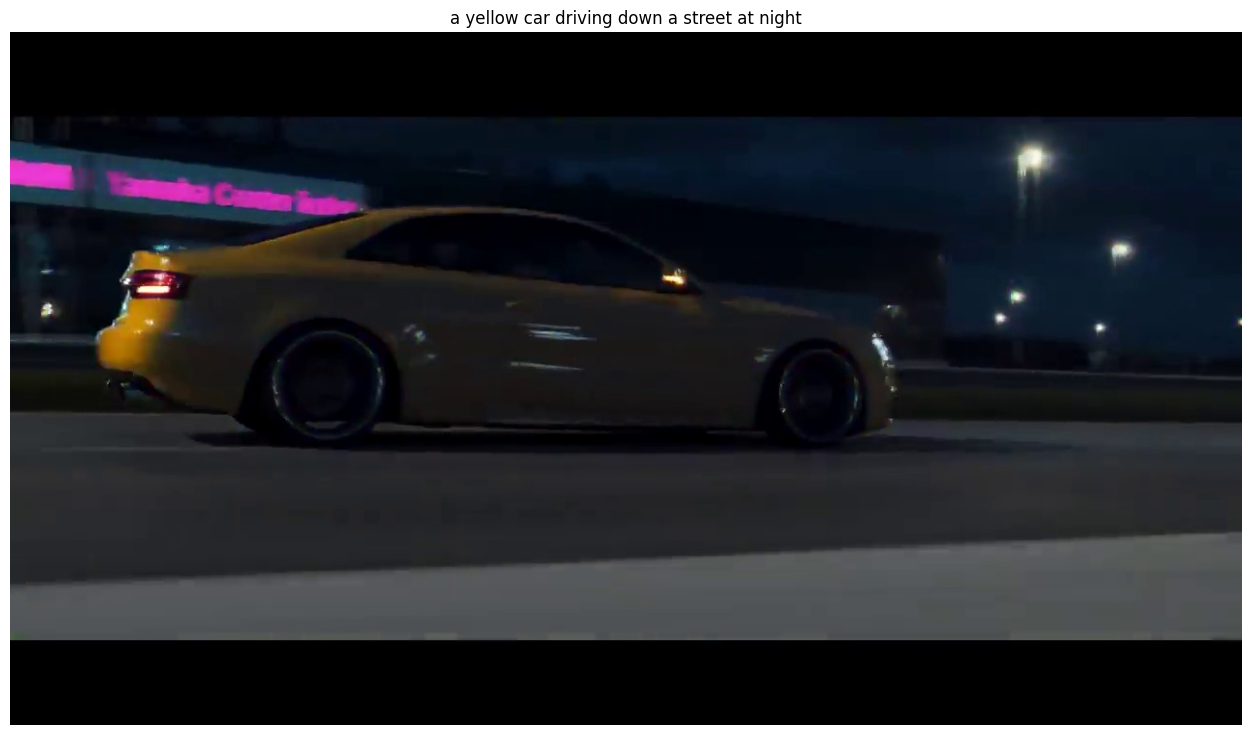

In [2]:
# Tiền xử lý ảnh
# Load ảnh từ file (có thể thay bằng ảnh từ URL hoặc PIL Image)
import cv2 
import matplotlib.pyplot as plt

image_path = "C:\\python\\AIC\\Test_Result\\ExtractKeyFrame\\vid3\\scene_034.jpg"  # 👉 đổi đường dẫn ảnh tại đây
raw_image = Image.open(image_path).convert('RGB')
inputs = processor(images=raw_image, return_tensors="pt")

img = cv2.imread(image_path,1)[:,:,::-1]
# Sinh caption
with torch.no_grad():
    output = model.generate(**inputs)


caption0 = processor.decode(output[0], skip_special_tokens=True)

plt.figure(figsize=(16,9))
plt.imshow(img)
plt.axis(False)
plt.title(caption0)
plt.show()

In [3]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    # 1. Tokenize
    tokens = word_tokenize(text)

    # 2. Chuyển sang chữ thường
    tokens = [word.lower() for word in tokens]

    # 3. Loại bỏ dấu câu
    tokens = [word for word in tokens if word not in string.punctuation]

    # 4. Loại bỏ stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

In [5]:
import json

# Mở và đọc file
with open("vqa_project.fs.chunks.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# In nội dung đã đọc
print(data[0]['data'])

{'$binary': {'base64': '/9j/4AAQSkZJRgABAgAAAQABAAD//gAQTGF2YzU4LjkxLjEwMAD/2wBDAAgCAgICAgICAgICAgMDAwMDAwMDAwMDAwMDAwMEBAQDAwMDAwMDBAQEBAQEBAQEBAQEBAUFBQYGBQUHBwcICAr/xADxAAACAwEBAQEAAAAAAAAAAAAAAgMEAQUGBwgBAAMBAQEBAAAAAAAAAAAAAAABAgMEBQYQAAEDAwIDBQMIBQQKDAcJEQEAAgMEBRESBjETIVFBYRQHIjJxkQgVsYHwoSPRQjPBUuEWJGJygpLCsvE0Q1MXRNOT0oM1CSVzw2OiZLOEVBg2dLTWo1Xk1OMmReLE1Ve1WEZ2hbY4l1akpZR1EQABAgQDBAcECAMHAgUCBAcBAgARBCEDBRIxQWFRE4Fx8CIGFJEyobFS4dHBFUJiByMzNPGScoJTJBayJaLi0jVjQybjNsKDo1VUCIQXdJT/wAARCALQBQADASIAAhEAAxEA/9oADAMBAAIRAxEAPwDxCFiEP2HqFiBxQxuhA4D4IQxi1YtQ6CNGze9NH7yVvetBCHpa0cgIwEZCj1eKNXik6i5MhGQo9XijV4oY5A9MHjBUOv4rec5J1bu8uNIxbueDlKZOvBLzD2lZrQ5K9W2pZqS60akOTdqaPShCE2c3cxCEIZzdzELEJuebueoWIQzmngxYtWJNZ2IQhDHiEIQ0xCEIYxCEJNMQhCGMQhCG3qFiEMeoWIQx6hYhDHqFiEMeoQhDGLFqxDTEqZKkxiEIQxstWLcqW2IQhJt4hCE2MWrFqTGIQhDHqEIQ2xCEJOnqEIQxiEIQxiEIwexDYSYsQjBRg9iUXQtGlCwcU0RwR8iwNOQmja4Ob07womSICodotKzJodR8ep2aaF2kYB64U9DA5k7HuaexLRObloKtTFrIOY3SMY7FiQavuk0ADXQD7Hagia2MZ6cO3tVe7CPDvaHD9yrTXutA6TkD

In [11]:
print(data[0])

{'_id': {'$oid': '687faffb0b8252002076dc97'}, 'files_id': {'$oid': '687faffb0b8252002076dc96'}, 'n': 0, 'data': {'$binary': {'base64': '/9j/4AAQSkZJRgABAgAAAQABAAD//gAQTGF2YzU4LjkxLjEwMAD/2wBDAAgCAgICAgICAgICAgMDAwMDAwMDAwMDAwMDAwMEBAQDAwMDAwMDBAQEBAQEBAQEBAQEBAUFBQYGBQUHBwcICAr/xADxAAACAwEBAQEAAAAAAAAAAAAAAgMEAQUGBwgBAAMBAQEBAAAAAAAAAAAAAAABAgMEBQYQAAEDAwIDBQMIBQQKDAcJEQEAAgMEBRESBjETIVFBYRQHIjJxkQgVsYHwoSPRQjPBUuEWJGJygpLCsvE0Q1MXRNOT0oM1CSVzw2OiZLOEVBg2dLTWo1Xk1OMmReLE1Ve1WEZ2hbY4l1akpZR1EQABAgQDBAcECAMHAgUCBAcBAgARBCEDBRIxQWFRE4Fx8CIGFJEyobFS4dHBFUJiByMzNPGScoJTJBayJaLi0jVjQybjNsKDo1VUCIQXdJT/wAARCALQBQADASIAAhEAAxEA/9oADAMBAAIRAxEAPwDxCFiEP2HqFiBxQxuhA4D4IQxi1YtQ6CNGze9NH7yVvetBCHpa0cgIwEZCj1eKNXik6i5MhGQo9XijV4oY5A9MHjBUOv4rec5J1bu8uNIxbueDlKZOvBLzD2lZrQ5K9W2pZqS60akOTdqaPShCE2c3cxCEIZzdzELEJuebueoWIQzmngxYtWJNZ2IQhDHiEIQ0xCEIYxCEJNMQhCGMQhCG3qFiEMeoWIQx6hYhDHqFiEMeoQhDGLFqxDTEqZKkxiEIQxstWLcqW2IQhJt4hCE2MWrFqTGIQhDHqEIQ2xCEJOnqEIQxiEIQxiEIwexDYSYsQjBRg9iUXQtGlCwcU0RwR8iwNOQmja4O

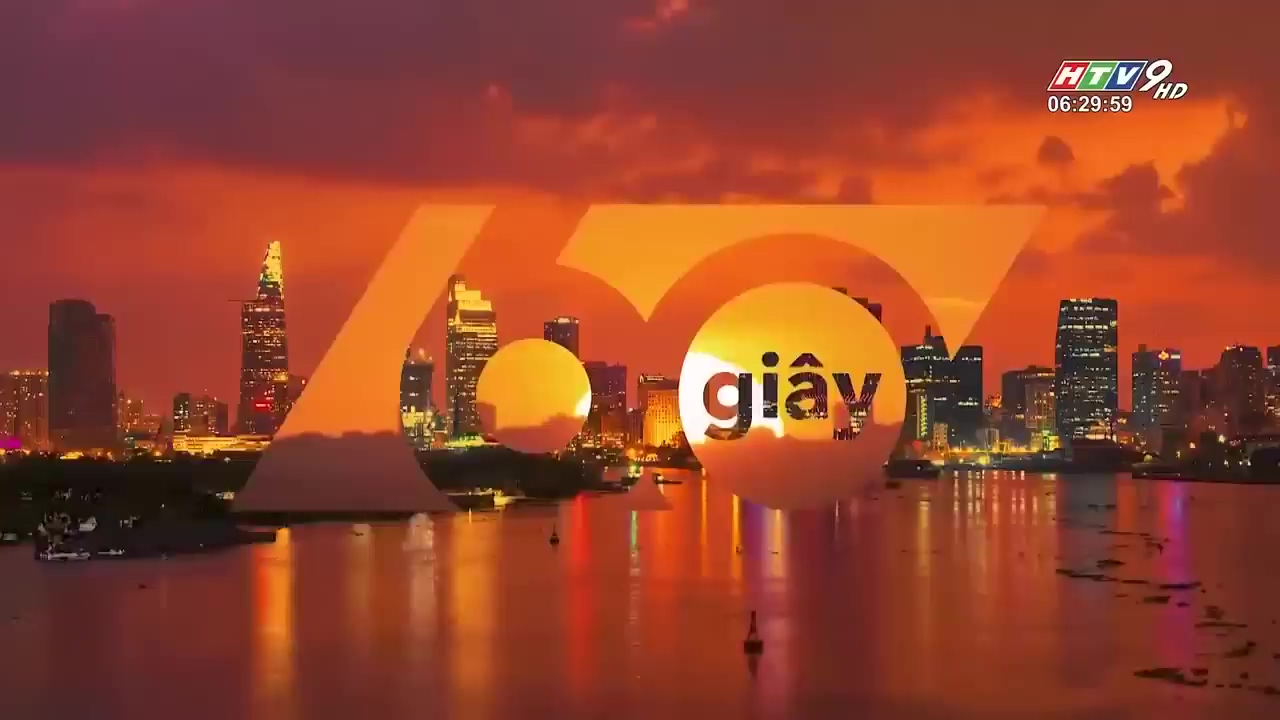

In [10]:
import base64
base64_string = data[0]['data']['$binary']['base64']
image_data = base64_to_pil(base64_string)
image_data

In [ ]:
from PIL import Image, ImageFile
import base64
from io import BytesIO
import json
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Cho phép Pillow mở ảnh không đầy đủ
ImageFile.LOAD_TRUNCATED_IMAGES = True

def base64_to_pil(base64_string):
    if base64_string.startswith("data:"):
        base64_string = base64_string.split(",")[1]
    image_data = base64.b64decode(base64_string)
    image_io = BytesIO(image_data)
    try:
        image = Image.open(image_io)
        return image
    except OSError as e:
        print("❌ Lỗi mở ảnh:", e)
        return None

def predict_caption(img):
    raw_image = img.convert('RGB')
    inputs = processor(images=raw_image, return_tensors="pt")
    # Sinh caption
    with torch.no_grad():
        output = model.generate(**inputs)
    caption= processor.decode(output[0], skip_special_tokens=True)
    return caption

def preprocess_caption(caption):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(caption)
    tokens = [t.lower() for t in tokens if t.lower() not in stop_words and t not in string.punctuation]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thainguyen5484\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thainguyen5484\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import json
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Chỉ cần chạy một lần nếu chưa có dữ liệu


import json

# Mở và đọc file
with open("vqa_project.fs.chunks.json", "r", encoding="utf-8") as f:
    data = json.load(f)
print(len(data))

data_with_caption =[]

for i,j_son in enumerate(data):
    str_base64= j_son['data']['$binary']['base64']

    img_base64=base64_to_pil(str_base64)
    if (img_base64 is None):
        continue
    caption= predict_caption(img_base64)
    
    tokens = preprocess_caption(caption)
    data_with_caption.append({
        "base64": str_base64,
        "tokens": tokens,
        "caption":caption
    })


# Ghi ra file JSON
with open("captions_tokenized.json", "w", encoding="utf-8") as f:
    json.dump(data_with_caption, f, indent=2)

print("✅ Đã lưu xong vào captions_tokenized.json")

1344
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F0431829D0>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F040F434C0>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F026BF6070>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F043183B00>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F04319D0D0>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F0433DE700>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F043066610>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F043066610>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F0431A7BF0>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F0424B8450>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x000001F0424B8450>
❌ Lỗi mở ảnh: cannot identify image file <_io.BytesIO object at 0x00000